## 1. Image Data Handling

In [1]:
# import necessary libraries for plotting images
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
# plot in jupyter notebook itself
%matplotlib inline

In [4]:
# read an image
img = plt.imread('../datasets/emergency_classification/images/0.jpg')

In [5]:
# print image
img

array([[[115, 134, 141],
        [116, 135, 142],
        [116, 135, 142],
        ...,
        [ 70,  81,  87],
        [ 74,  85,  91],
        [ 82,  93,  99]],

       [[115, 134, 141],
        [116, 135, 142],
        [116, 135, 142],
        ...,
        [ 82,  93,  99],
        [ 82,  93,  99],
        [ 83,  94, 100]],

       [[115, 134, 141],
        [116, 135, 142],
        [116, 135, 142],
        ...,
        [ 77,  88,  94],
        [ 75,  86,  92],
        [ 76,  87,  93]],

       ...,

       [[ 39,  39,  37],
        [ 36,  36,  34],
        [ 35,  35,  33],
        ...,
        [ 42,  41,  39],
        [ 45,  44,  42],
        [ 43,  42,  40]],

       [[ 38,  38,  36],
        [ 37,  37,  35],
        [ 36,  36,  34],
        ...,
        [ 45,  44,  42],
        [ 43,  42,  40],
        [ 34,  33,  31]],

       [[ 33,  33,  31],
        [ 33,  33,  31],
        [ 32,  32,  30],
        ...,
        [ 43,  42,  40],
        [ 34,  33,  31],
        [ 20,  19,  17]]

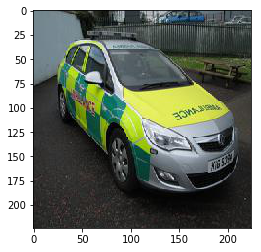

In [6]:
# plot image
plt.imshow(img)

In [7]:
# display image shape
img.shape

(224, 224, 3)

In [8]:
# display a pixel
img[0, 0]

array([115, 134, 141], dtype=uint8)

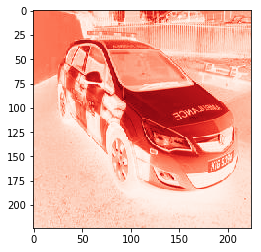

In [9]:
# show red channel
plt.imshow(img[:, :, 0], cmap='Reds') 

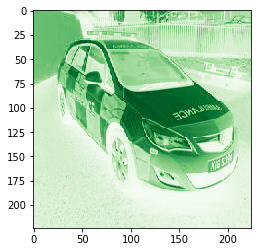

In [10]:
# show green channel
plt.imshow(img[:, :, 1], cmap='Greens')

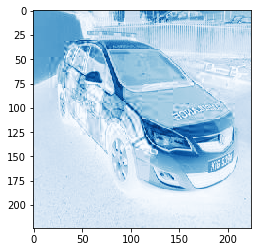

In [11]:
# show blue channel
plt.imshow(img[:, :, 2], cmap='Blues')

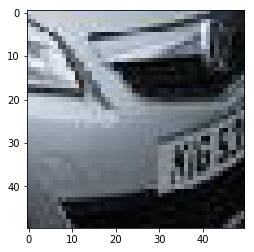

In [12]:
# extract part of image
patch = img[125:175 , 150:200]


# plot part of image
plt.imshow(patch)

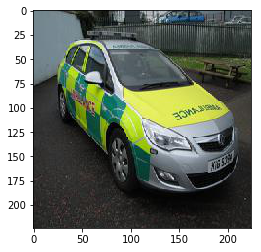

In [13]:
# plot image
plt.imshow(img)

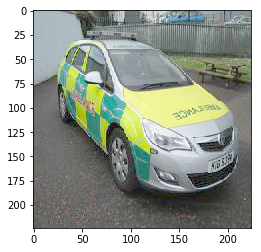

In [14]:
# load library
from skimage.exposure import adjust_gamma

# increase brightness
plt.imshow(adjust_gamma(img, 0.5))

## 2. Data Exploration

In [15]:
from glob import glob

In [16]:
images = glob('../datasets/emergency_classification/images/*.jpg')

In [17]:
images

['../datasets/emergency_classification/images/1770.jpg',
 '../datasets/emergency_classification/images/1314.jpg',
 '../datasets/emergency_classification/images/341.jpg',
 '../datasets/emergency_classification/images/1995.jpg',
 '../datasets/emergency_classification/images/951.jpg',
 '../datasets/emergency_classification/images/1082.jpg',
 '../datasets/emergency_classification/images/1278.jpg',
 '../datasets/emergency_classification/images/2087.jpg',
 '../datasets/emergency_classification/images/1943.jpg',
 '../datasets/emergency_classification/images/1391.jpg',
 '../datasets/emergency_classification/images/906.jpg',
 '../datasets/emergency_classification/images/853.jpg',
 '../datasets/emergency_classification/images/111.jpg',
 '../datasets/emergency_classification/images/1515.jpg',
 '../datasets/emergency_classification/images/1031.jpg',
 '../datasets/emergency_classification/images/1495.jpg',
 '../datasets/emergency_classification/images/914.jpg',
 '../datasets/emergency_classificatio

In [18]:
# To stop potential randomnes
rng = np.random.RandomState()

In [19]:
img_name = rng.choice(images)
img_name

'../datasets/emergency_classification/images/535.jpg'

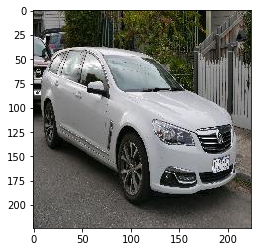

In [20]:
img_name = rng.choice(images)

img = plt.imread(img_name)

plt.imshow(img)

In [21]:
import pandas as pd

In [22]:
data = pd.read_csv('../datasets/emergency_classification/emergency_classification.csv')

In [23]:
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [24]:
data['emergency_or_not'].value_counts()

0    1361
1     991
Name: emergency_or_not, dtype: int64

In [25]:
# Randomly select a row from our data
# Pick out the name of the image
# Read and plot the image
# Pick out the class from the target for the corresponding image
# Print class of the vehicle

It is NOT an emergency vehicle


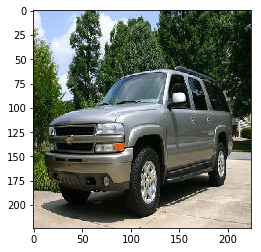

In [26]:
# Randomly select a row from our data
row_index = rng.choice(data.index)

# Pick out name of the image
img_name = data.iloc[row_index]['image_names']

# Read and plot the image
img = plt.imread('../datasets/emergency_classification/images/' + img_name)
plt.imshow(img)

# Pick out class from the target for the corresponding image
target = data.iloc[row_index]['emergency_or_not']

# Print class of the vehicle
if target == 1:
    print('It is an emergency vehicle')
else:
    print('It is NOT an emergency vehicle')

## 3. Data Loading and Preprocessing

### Model Training Process

<img src="images/model.png" alt="drawing" style="width:500px;" align="left"/>

### Stack Images one over the other

<img src="images/book_stack.jpg" alt="drawing" style="width:500px;" align="left"/>

In [27]:
# create an empty python list
X = []

# go through all the image locations one by one
for img_name in data.image_names:
    # read the image from location
    img = plt.imread('../datasets/emergency_classification/images/' + img_name)
    # pile it one over the other
    X.append(img)
    
# convert this python list to a single numpy array
X = np.array(X)

In [28]:
X.shape

(2352, 224, 224, 3)

In [29]:
y = data.emergency_or_not.values

In [30]:
y.shape

(2352,)

In [31]:
from keras.utils import to_categorical

y = to_categorical(y)
y.shape

Using TensorFlow backend.


(2352, 2)

In [32]:
X

array([[[[115, 134, 141],
         [116, 135, 142],
         [116, 135, 142],
         ...,
         [ 70,  81,  87],
         [ 74,  85,  91],
         [ 82,  93,  99]],

        [[115, 134, 141],
         [116, 135, 142],
         [116, 135, 142],
         ...,
         [ 82,  93,  99],
         [ 82,  93,  99],
         [ 83,  94, 100]],

        [[115, 134, 141],
         [116, 135, 142],
         [116, 135, 142],
         ...,
         [ 77,  88,  94],
         [ 75,  86,  92],
         [ 76,  87,  93]],

        ...,

        [[ 39,  39,  37],
         [ 36,  36,  34],
         [ 35,  35,  33],
         ...,
         [ 42,  41,  39],
         [ 45,  44,  42],
         [ 43,  42,  40]],

        [[ 38,  38,  36],
         [ 37,  37,  35],
         [ 36,  36,  34],
         ...,
         [ 45,  44,  42],
         [ 43,  42,  40],
         [ 34,  33,  31]],

        [[ 33,  33,  31],
         [ 33,  33,  31],
         [ 32,  32,  30],
         ...,
         [ 43,  42,  40],
        

In [33]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [34]:
X.min(), X.max()

(0, 255)

In [35]:
from keras.applications.vgg16 import preprocess_input

In [36]:
X = preprocess_input(X, mode='tf')

In [37]:
X.min(), X.max()

(-1.0, 1.0)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

## 4. Model Building


1. Load data (done)
2. Pre-Process it (done)
3. Load weights of pre-trained model
4. Finetune model for the current problem
5. Validate if it works fine, iterate again if it does not

<tr>
    <td><img src="images/imagenet_challenge.png" alt="drawing" style="width:500px;" align="left"/></td>
    <td><img src="images/screenshot.png" alt="drawing" style="width:500px;" align="left"/></td>
</tr>


[Source](https://www.slideshare.net/xavigiro/image-classification-on-imagenet-d1l4-2017-upc-deep-learning-for-computer-vision/)

In [40]:
from keras.applications.vgg16 import VGG16

In [41]:
base_model = VGG16(weights='imagenet')

In [42]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

<img src="images/original_vgg_model_input.png" alt="drawing" style="width:500px;"/>

<img src="images/original_vgg_model_knowledge_layer.png" alt="drawing" style="width:500px;"/>

<img src="images/original_vgg_model_top_layer.png" alt="drawing" style="width:500px;"/>

In [43]:
from skimage.transform import resize

/opt/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/opt/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(224, 224, 3)

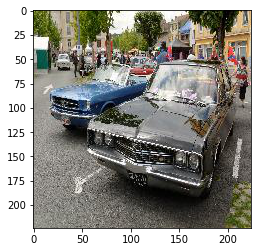

In [44]:
new_img = resize(img, (224, 224, 3))
plt.imshow(new_img)
new_img.shape

In [45]:
base_model = VGG16(weights='imagenet', input_shape=(224, 224, 3), include_top=False)

In [46]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

1. Extract features
2. Reshape the data
3. Rescale features
4. Create top model
5. Train the model

In [47]:
base_model_pred = base_model.predict(X_train)
base_model_pred_valid = base_model.predict(X_valid)

In [48]:
base_model_pred.shape

(1646, 7, 7, 512)

In [49]:
base_model_pred = base_model_pred.reshape(1646, 7*7*512)

In [50]:
base_model_pred_valid.shape

(706, 7, 7, 512)

In [51]:
base_model_pred_valid = base_model_pred_valid.reshape(706, 7*7*512)

In [52]:
base_model_pred.max()

11.343673

In [53]:
max_val = base_model_pred.max()

base_model_pred = base_model_pred / max_val
base_model_pred_valid = base_model_pred_valid / max_val

In [54]:
base_model_pred.min(), base_model_pred.max()

(0.0, 1.0)

In [55]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer

In [56]:
model = Sequential()
model.add(InputLayer((7*7*512, )))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [57]:
model.compile(optimizer='sgd', metrics=['accuracy'], loss='categorical_crossentropy')

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2050      
Total params: 25,693,186
Trainable params: 25,693,186
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(base_model_pred, y_train, epochs=15, validation_data=(base_model_pred_valid, y_valid))

Train on 1646 samples, validate on 706 samples
Epoch 1/15
1646/1646 [==============================] - 1s 804us/step - loss: 0.6383 - acc: 0.6282 - val_loss: 0.6241 - val_acc: 0.5652
Epoch 2/15
1646/1646 [==============================] - 1s 312us/step - loss: 0.5627 - acc: 0.7649 - val_loss: 0.5411 - val_acc: 0.8159
Epoch 3/15
1646/1646 [==============================] - 1s 313us/step - loss: 0.5003 - acc: 0.8214 - val_loss: 0.4993 - val_acc: 0.7762
Epoch 4/15
1646/1646 [==============================] - 1s 307us/step - loss: 0.4514 - acc: 0.8384 - val_loss: 0.4556 - val_acc: 0.8116
Epoch 5/15
1646/1646 [==============================] - 1s 310us/step - loss: 0.4138 - acc: 0.8499 - val_loss: 0.4251 - val_acc: 0.8201
Epoch 6/15
1646/1646 [==============================] - 1s 314us/step - loss: 0.3826 - acc: 0.8615 - val_loss: 0.3949 - val_acc: 0.8385
Epoch 7/15
1646/1646 [==============================] - 1s 316us/step - loss: 0.3561 - acc: 0.8785 - val_loss: 0.3757 - val_acc: 0.8669
E

In [60]:
predictions = model.predict_classes(base_model_pred_valid)
predictions

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [61]:
prediction_probabilities = model.predict(base_model_pred_valid)
prediction_probabilities

array([[0.93991846, 0.06008152],
       [0.07122206, 0.92877793],
       [0.96349573, 0.0365043 ],
       ...,
       [0.03242061, 0.9675794 ],
       [0.73993504, 0.26006502],
       [0.70301235, 0.2969876 ]], dtype=float32)

There is 98 % chance that it is an emergency vehicle
whereas actual class is 1


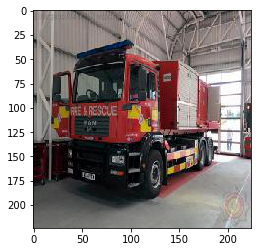

In [62]:
# pull out original images from the data which correspond to the validation data
_, valid_images, _, _ = train_test_split(data.image_names.values, y, test_size=0.3, random_state=42)

# get a random image from validation data
img_name = rng.choice(valid_images)

# get the corresponding probability and actual class
prob = (prediction_probabilities[:, 1] * 100).astype(int)[np.where(valid_images == img_name)[0][0]]
actual_class = data.loc[data.image_names == img_name, 'emergency_or_not'].values[0]

# read the image
img = plt.imread('../datasets/emergency_classification/images/' + img_name)

# print probability and actual class
print('There is', prob, '% chance that it is an emergency vehicle')
print('whereas actual class is', actual_class)

# plot the image
plt.imshow(img)